In [4]:
import numpy as np
import matplotlib.pyplot as plt

from models.target import Target, get_jacobian_F
from models.drone import get_jacobian_H, Drone, pos2z, z2pos
from filters.kalman import ExtendedKalmanFilter
from utils.plotting import animate

np.random.seed(9430)

N = 100 # number of time steps
Q_model = np.diag([0, 0, 0.3, 0.6])**2 # process noise
x0 = np.array([0, 0, 0, 0.1]) # initial state [x, y, alpha, velocity]'

R = np.diag([0.1, 0.1])**2 # measurement noise
P0 = np.eye(4)*10 # initial covariance

# get track 
target = Target(x0) # x,y,a = 0, v = 1
dt = 1
track = [target.update_states(dt, Q_model) for _ in range(N)]

# get sensor measurements
drone = Drone(np.array([0, 0, 10]), np.array([1, 0, 0.5]))

Q = Q_model # kalman filter process noise 3x larger than actual process noise
kf = ExtendedKalmanFilter(x0, P0, Q_model, R)

for t in track:
    # drone.velocity+= np.random.multivariate_normal([0,0,0], np.diag([0.1, 0.1, 0.1]))
    z = drone.sense(t, R.diagonal())
    kf.predict(target.transition, get_jacobian_F, dt)
    kf.update(z, drone.get_pos(), pos2z, get_jacobian_H)
    drone.update(dt)

kf.logger.to_numpy()

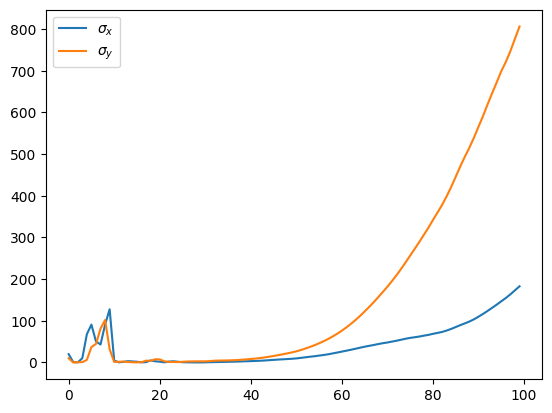

In [2]:
plt.plot(kf.logger.cov[:,0,0], label='$\sigma_x$')
plt.plot(kf.logger.cov[:,1,1], label='$\sigma_y$')
plt.legend()

In [4]:
from models.drone import pos2z, get_jacobian_H
import numpy as np

get_jacobian_H(np.array([0,0]), np.array([0,0,1]))

ValueError: not enough values to unpack (expected 3, got 2)